In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import scienceplots

import sys
sys.path.append("../../../src/")
import nanonets_utils
import nanonets

plt.style.use(["science","bright"])

## Magic Cable Comparison

In [2]:
N_p                 = 5
radius              = 1e6
topology_parameter  = {
    "Nx"                : 3,
    "Ny"                : 3,
    "Nz"                : 1,
    "e_pos"             : [[1,0,0],[1,2,0]],
    "electrode_type"    : ['constant','floating']
}
np_info2    = {
    'np_index'      : [9], 
    'mean_radius'   : radius,
    'std_radius'    : 0.0
}

In [3]:
sim_class   = nanonets.simulation(topology_parameter=topology_parameter, np_info2=np_info2, high_C_output=True)
print(sim_class)
print(sim_class.radius_vals)

Topology Class with 11 particles, 5 junctions.
Network Topology:
[[-100    1    3 -100 -100 -100]
 [   1    0    2    4 -100 -100]
 [-100    1    5 -100 -100 -100]
 [-100    0    4    6 -100 -100]
 [-100    1    3    5    7 -100]
 [-100    2    4    8 -100 -100]
 [-100    3    7 -100 -100 -100]
 [-100    4    6    8    9 -100]
 [-100    5    7 -100 -100 -100]
 [-100    7   10 -100 -100 -100]
 [   2    9 -100 -100 -100 -100]]
[1.e+01 1.e+01 1.e+01 1.e+01 1.e+01 1.e+01 1.e+01 1.e+01 1.e+01 1.e+06
 1.e+01]


In [4]:
pd.DataFrame(sim_class.capacitance_matrix).round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,8.81,-2.24,0.00,-2.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-2.24,13.28,-2.24,0.00,-2.24,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,-2.24,8.81,0.00,0.00,-2.24,0.00,0.00,0.00,0.00,0.00
3,-2.24,0.00,0.00,11.05,-2.24,0.00,-2.24,0.00,0.00,0.00,0.00
4,0.00,-2.24,0.00,-2.24,13.28,-2.24,0.00,-2.24,0.00,0.00,0.00
5,0.00,0.00,-2.24,0.00,-2.24,11.05,0.00,0.00,-2.24,0.00,0.00
6,0.00,0.00,0.00,-2.24,0.00,0.00,8.81,-2.24,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,-2.24,0.00,-2.24,13.94,-2.24,-2.89,0.00
8,0.00,0.00,0.00,0.00,0.00,-2.24,0.00,-2.24,8.81,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.89,0.00,433939.31,-2.89


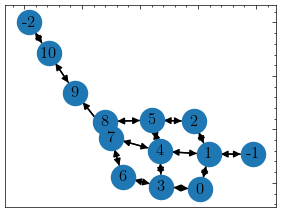

In [5]:
nx.draw_networkx(sim_class.G)

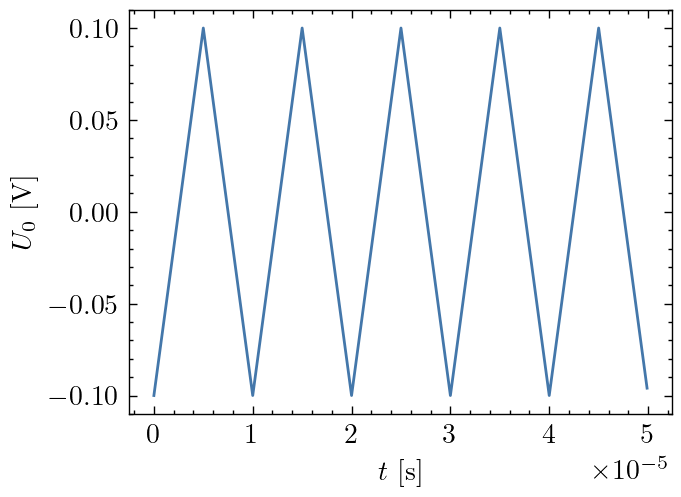

In [6]:
vals_per_sweep  = 50
N_sweeps        = 10
input_volt      = np.linspace(-0.1,0.1,vals_per_sweep, endpoint=False)
for s in range(1,N_sweeps):
    if s % 2 == 0:
        input_volt  = np.append(input_volt, np.linspace(-0.1,0.1,vals_per_sweep, endpoint=False))
    else:
        input_volt  = np.append(input_volt, np.linspace(0.1,-0.1,vals_per_sweep, endpoint=False))
N_values        = len(input_volt)
voltages        = np.zeros(shape=(N_values,3))
voltages[:,0]   = input_volt
time_step       = 1e-7
t_vals          = np.arange(N_values)*time_step

fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax.plot(t_vals, input_volt, '-')
ax.set_xlabel("$t$ [s]")
ax.set_ylabel("$U_0$ [V]")

fig.savefig("input_series.svg", transparent=True)

In [7]:
sim_class.run_var_voltages(voltages=voltages, time_steps=t_vals, target_electrode=1, T_val=5.0, save=False)

In [8]:
outputs = sim_class.return_output_values()
states  = sim_class.return_potential_landscape()

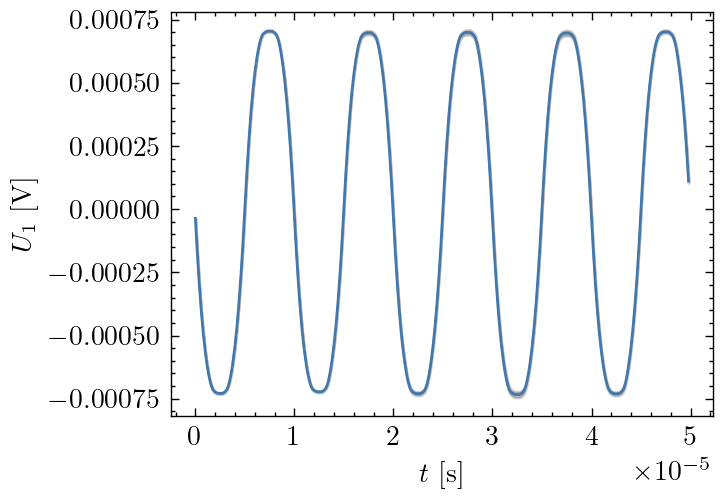

In [9]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax.plot(t_vals[:-1], outputs[:,2], '-')
ax.fill_between(t_vals[:-1], outputs[:,2]-outputs[:,3], outputs[:,2]+outputs[:,3], alpha=0.2, color='black')
ax.set_xlabel("$t$ [s]")
ax.set_ylabel("$U_1$ [V]")

fig.savefig("output_series.svg", transparent=True)

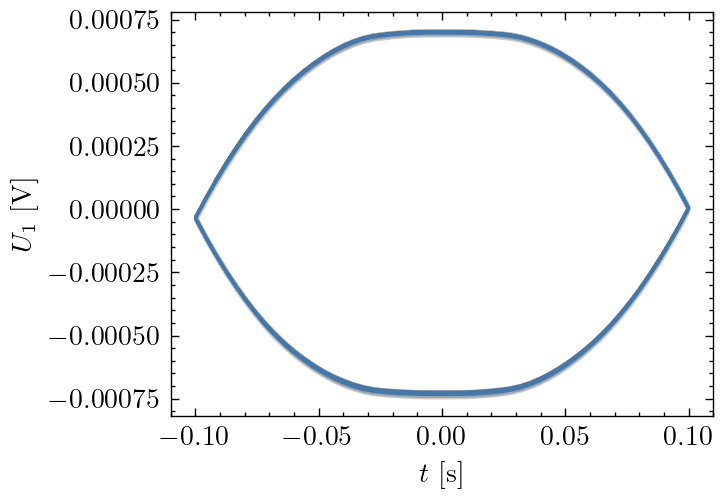

In [10]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax.plot(input_volt[:-1], outputs[:,2], '-')
ax.fill_between(input_volt[:-1], outputs[:,2]-outputs[:,3], outputs[:,2]+outputs[:,3], alpha=0.2, color='black')
ax.set_xlabel("$t$ [s]")
ax.set_ylabel("$U_1$ [V]")

fig.savefig("output_phase_series.svg", transparent=True)

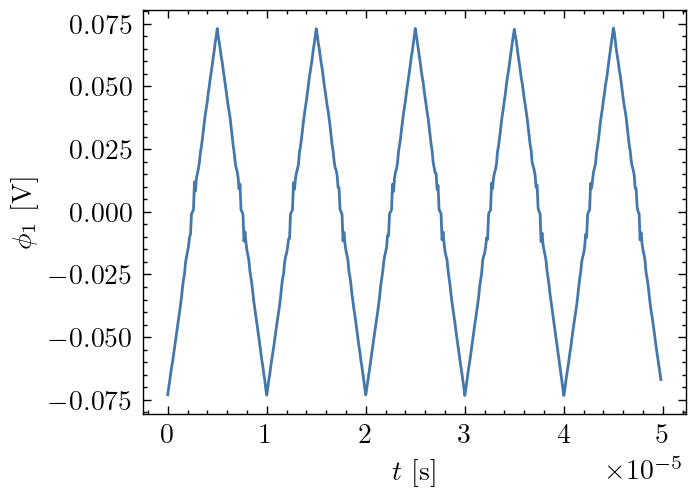

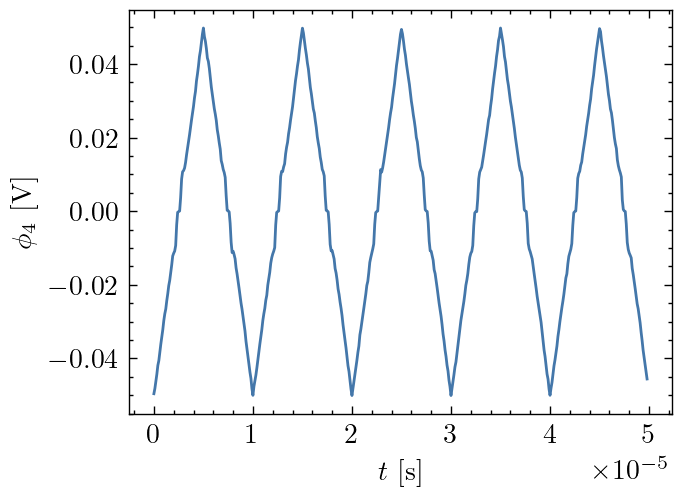

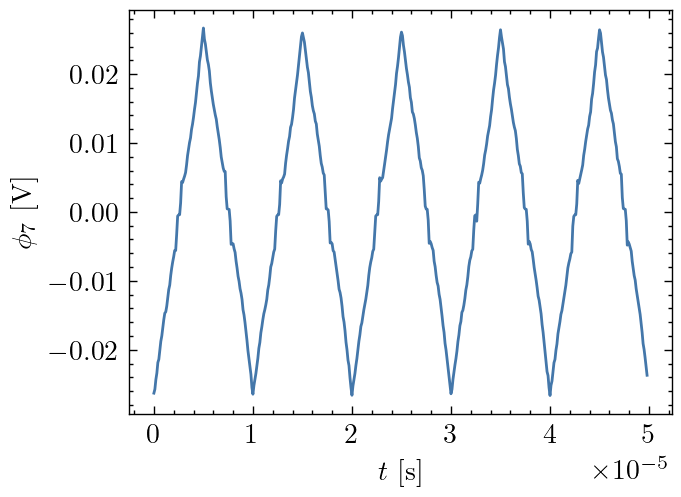

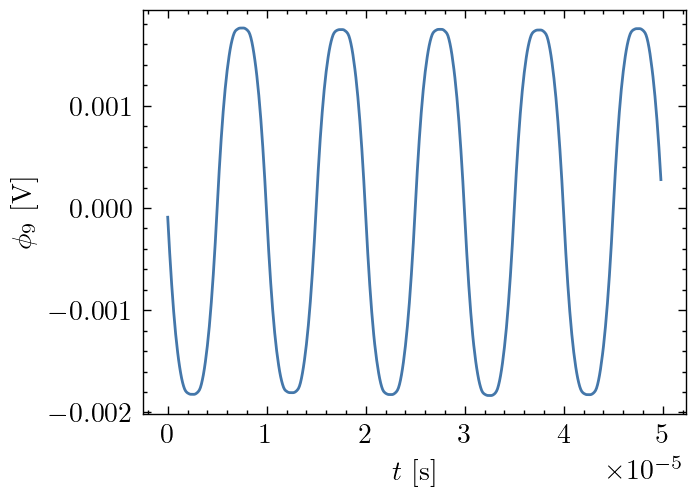

In [11]:
for i in [1,4,7,9]:

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(t_vals[:-1], states[:,i+2], '-')
    ax.set_xlabel("$t$ [s]")
    ax.set_ylabel(f"$\phi_{i}$ [V]")
    fig.savefig(f"phi_{i}_series.svg", transparent=True)


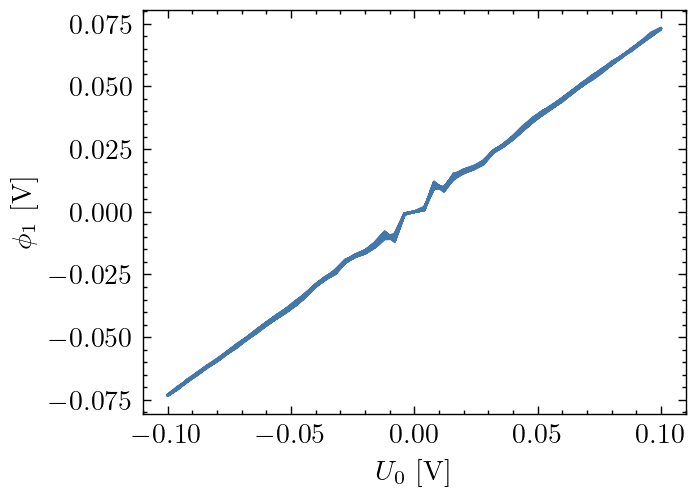

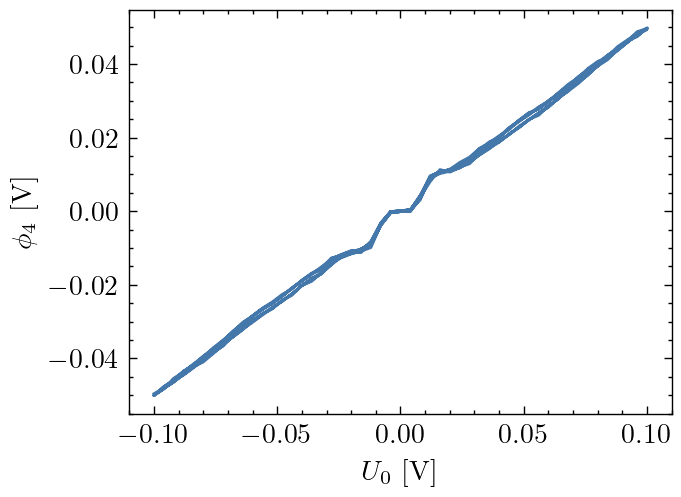

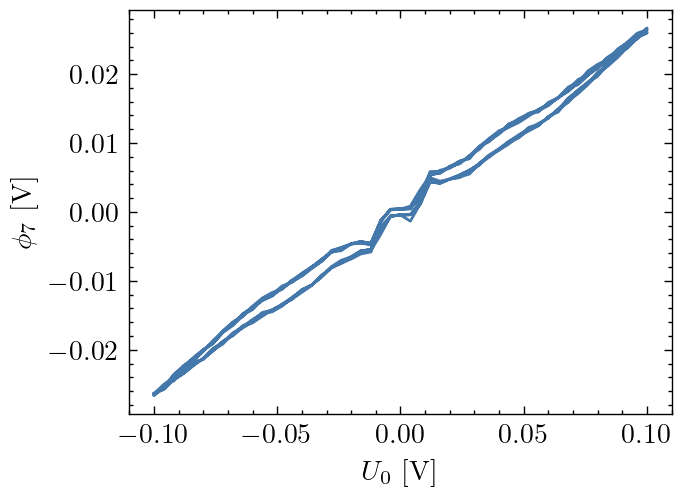

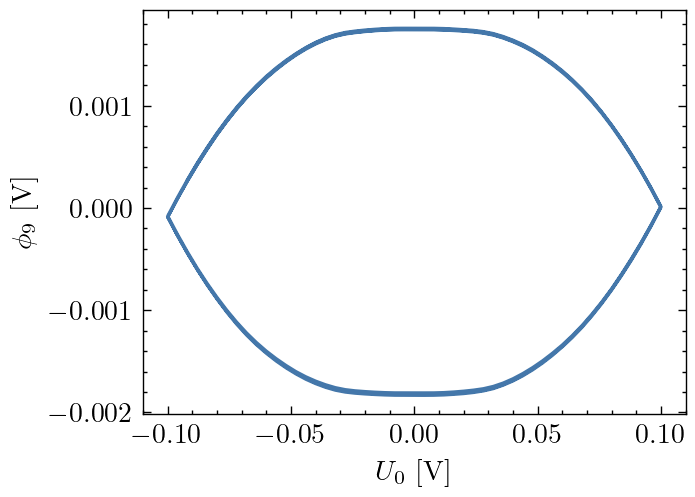

In [12]:
for i in [1,4,7,9]:

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(input_volt[:-1], states[:,i+2], '-')
    ax.set_xlabel("$U_0$ [V]")
    ax.set_ylabel(f"$\phi_{i}$ [V]")
    fig.savefig(f"phase_{i}_series.svg", transparent=True)

In [13]:
# topology_parameter  = {
#     "Nx"                : N_p,
#     "Ny"                : N_p,
#     "Nz"                : 1,
#     "e_pos"             : [[(N_p-1)//2,0,0],[0,0,0],[N_p-1,0,0],[0,(N_p-1)//2,0],
#                            [N_p-1,(N_p-1)//2,0],[0,N_p-1,0],[N_p-1,N_p-1,0],[(N_p-1)//2,N_p-1,0]],
#     "electrode_type"    : ['constant','constant','constant','constant','constant','constant','constant','floating']
# }
# sim_class   = nanonets.simulation(topology_parameter=topology_parameter)
# pos         = sim_class.pos
# fig         = plt.figure(dpi=200)
# ax          = fig.add_subplot()
# fig, ax     = nanonets_utils.display_network_currents(df=network_currents, row=(2000,10000), N_electrodes=8, charge_landscape=states,
#                                                       fig=fig, ax=ax, node_size=50, position_by_currents=False, pos=pos, arrowsize=8)